In [1]:
## Most Important
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## less Important
import os
from scipy import stats
import missingno as msno
import joblib
import tarfile
import shutil
import urllib

## Sklearn
from sklearn import datasets
## Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
## Metrics
from sklearn.metrics import accuracy_score

## tensorflow & Keras
import tensorflow as tf    ## i will use tf for every thing and for keras using tf.keras

## Vanishing or Exploding the Gradients
1. Choose a best Activation Function
2. Choose a best Initialization technique
3. try using a faster Optimizer

### Loading `Fashion MNIST Dataset` 

In [2]:
### Building a Sequential API for multiclass Classification

## loading the Fashion MNIST 
(X_train_full, y_train_full), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

## show shapes, dtypes and transfer datatypes to (float32, enough for NN)
## and rescale the inputs to be from (0-1)

X_train_full = (X_train_full/255.0).astype('float32')
y_train_full = y_train_full.astype('int32')

X_test = (X_test/255.0).astype('float32')
y_test = y_test.astype('int32')

## split train to train & val
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, 
                                                  test_size=0.1, shuffle=True)


print('X_train_full shape =>', X_train_full.shape)
print('y_train_full shape =>', y_train_full.shape)
print('==='*15)
print('X_train shape =>', X_train.shape)
print('y_train shape =>', y_train.shape)
print('==='*15)
print('X_val shape =>', X_val.shape)
print('y_val shape =>', y_val.shape)
print('==='*15)
print('X_test shape =>', X_test.shape)
print('y_test shape =>', y_test.shape)
print('==='*25)
print('X_train , y_train -- dtypes =>', (X_train.dtype, y_train.dtype))
print('X_val , y_val -- dtypes =>', (X_val.dtype, y_val.dtype))
print('X_test , y_test -- dtypes =>', (X_test.dtype, y_test.dtype))

X_train_full shape => (60000, 28, 28)
y_train_full shape => (60000,)
X_train shape => (54000, 28, 28)
y_train shape => (54000,)
X_val shape => (6000, 28, 28)
y_val shape => (6000,)
X_test shape => (10000, 28, 28)
y_test shape => (10000,)
X_train , y_train -- dtypes => (dtype('float32'), dtype('int32'))
X_val , y_val -- dtypes => (dtype('float32'), dtype('int32'))
X_test , y_test -- dtypes => (dtype('float32'), dtype('int32'))


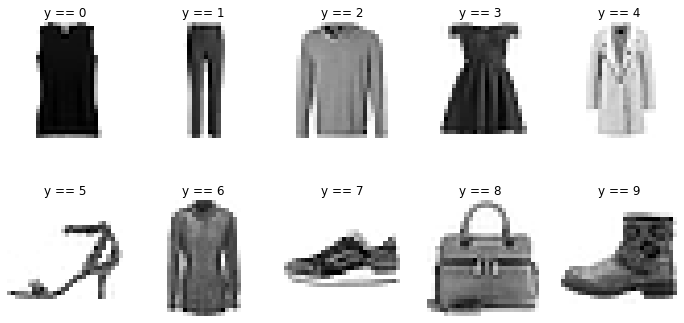

In [3]:
target_only_plot = pd.DataFrame(y_train, columns=['target'])

## get first index only i need only one unique value to test to 
## what this number belong to what photo (i hope you understand me)
## although the images are diffrent for each class_name < like (coats have diffrent images)
## but still have the same number of target, that what i only want

img_indicies = {}

for i in range(len(np.unique(y_train))):
    img_indicies[i] = target_only_plot[target_only_plot['target']==i].index[0]   

    
keys = list(img_indicies.keys())

fig, ax = plt.subplots(2, 5, figsize=(12, 6))

plt.sca(ax[0,0])
plt.imshow(X_train[img_indicies[0]], cmap='binary')
plt.title(f'y == {keys[0]}')
plt.axis('off')
plt.sca(ax[0,1])
plt.imshow(X_train[img_indicies[1]], cmap='binary')
plt.title(f'y == {keys[1]}')
plt.axis('off')
plt.sca(ax[0,2])
plt.imshow(X_train[img_indicies[2]], cmap='binary')
plt.title(f'y == {keys[2]}')
plt.axis('off')
plt.sca(ax[0,3])
plt.imshow(X_train[img_indicies[3]], cmap='binary')
plt.title(f'y == {keys[3]}')
plt.axis('off')
plt.sca(ax[0,4])
plt.imshow(X_train[img_indicies[4]], cmap='binary')
plt.title(f'y == {keys[4]}')
plt.axis('off')

###################
plt.sca(ax[1,0])
plt.imshow(X_train[img_indicies[5]], cmap='binary')
plt.title(f'y == {keys[5]}')
plt.axis('off')
plt.sca(ax[1,1])
plt.imshow(X_train[img_indicies[6]], cmap='binary')
plt.title(f'y == {keys[6]}')
plt.axis('off')
plt.sca(ax[1,2])
plt.imshow(X_train[img_indicies[7]], cmap='binary')
plt.title(f'y == {keys[7]}')
plt.axis('off')
plt.sca(ax[1,3])
plt.imshow(X_train[img_indicies[8]], cmap='binary')
plt.title(f'y == {keys[8]}')
plt.axis('off')
plt.sca(ax[1,4])
plt.imshow(X_train[img_indicies[9]], cmap='binary')
plt.title(f'y == {keys[9]}')
plt.axis('off')
plt.show()

In [4]:
### you can now know for each target value belong to what class
class_names = ['T_Shirt', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle_Boot']


## you can now work like this

print('y_train in row 1 =>', y_train[0])
print('get its corresponding class =>', class_names[y_train[0]])

y_train in row 1 => 4
get its corresponding class => Coat


## `Kernel Initialization with diffrent Activation Functions`

##### 1. `Golorot Initialization` ==> preferable with (None, tanh, sigmoid, softmax)

* here ==> kernel_initializer='glorot_uniform' ==> default  <br />
* you can also use ('glorot_normal')
* glorot_normal use initialization mean=0, variance=(1/fan_avg), fan_avg = 0.5(fan_in+fan_out)<br />
* glorot_unifrom use initialization r=sqrt(3*variance)

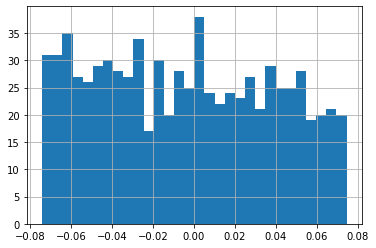

In [5]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, activation='tanh', kernel_initializer='glorot_uniform'))
model_fashion.add(tf.keras.layers.Dense(100, activation='tanh', kernel_initializer='glorot_uniform'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

## check for example layer 1
weights_1, biases_1 = model_fashion.layers[1].get_weights()

## check for feature of these features
pd.DataFrame(weights_1).iloc[:,0].hist(bins=30);  ## distribution of feature 1 ==> uniform distr.

##### 2. `He Initialization` ==> preferable with (relu, elu, leakyrelu, parametricrelu, randomizedrelu)

* here ==> kernel_initializer='he_normal'   <br />
* you can also use ('he_uniform')
* he_normal use initialization mean=0, variance=(2/fan_in)   <br />
* he_unifrom use initialization r=sqrt(3*variance)

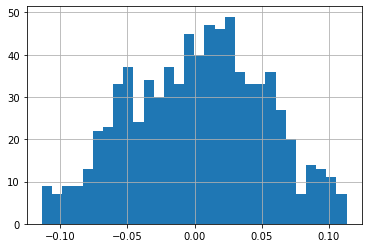

In [6]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

## check for example layer 1
weights_1, biases_1 = model_fashion.layers[1].get_weights()

## check for feature of these features
pd.DataFrame(weights_1).iloc[:,0].hist(bins=30);  ## distribution of feature 1 ==> normal distr.

##### 3. `LeCun Initialization` ==> preferable with (Selu)

* here ==> kernel_initializer='lecun_normal'   <br />
* you can also use ('lecun_uniform')
* lecun_normal use initialization mean=0, variance=(1/fan_in)   <br />
* lecun_unifrom use initialization r=sqrt(3*variance)

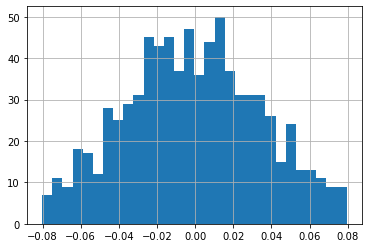

In [7]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
model_fashion.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

## check for example layer 1
weights_1, biases_1 = model_fashion.layers[1].get_weights()

## check for feature of these features
pd.DataFrame(weights_1).iloc[:,0].hist(bins=30);  ## distribution of feature 1 ==> normal distr.

#### you can apply `LeakRelu` like this
#### as i said, it is preferable for Relu and its variants to be 'he_normal or he_uniform' initailization

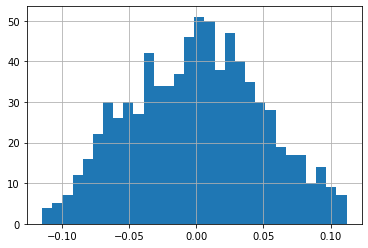

In [8]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.LeakyReLU(0.01))  ## here alpha=0.01
model_fashion.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

## check for example layer 1
weights_1, biases_1 = model_fashion.layers[1].get_weights()

## check for feature of these features
pd.DataFrame(weights_1).iloc[:,0].hist(bins=30);  ## distribution of feature 1 ==> normal distr.

#### you can apply `ParametricRelu` like this
#### as i said, it is preferable for Relu and its variants to be 'he_normal or he_uniform' initailization

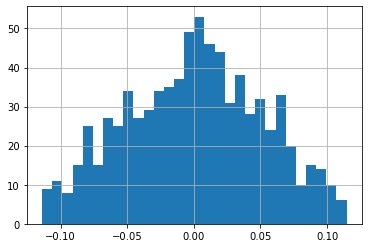

In [9]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.PReLU())  
model_fashion.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

## check for example layer 1
weights_1, biases_1 = model_fashion.layers[1].get_weights()

## check for feature of these features
pd.DataFrame(weights_1).iloc[:,0].hist(bins=30);  ## distribution of feature 1 ==> normal distr.

### `Conclusion`
#### you can choose 



In [10]:
values_1 = ['None, Sigmoid, tanh, softmax', 'Relu and its Variants', 'Selu']
values_2 = ['Golort', 'He', 'LeCun']
values_3 = ['1/fan_avg', '2/fan_in', '1/fan_in']
pd.DataFrame({'Activation': values_1, 'Initialization':values_2, 'variance':values_3})

,Activation,Initialization,variance
0,"None, Sigmoid, tanh, softmax",Golort,1/fan_avg
1,Relu and its Variants,He,2/fan_in
2,Selu,LeCun,1/fan_in


###### **Selu Notes :** <br />
This activation function was proposed in this [great paper](https://arxiv.org/pdf/1706.02515.pdf) by Günter Klambauer, Thomas Unterthiner and Andreas Mayr, published in June 2017. During training, a neural network composed exclusively of a stack of dense layers using the SELU activation function and LeCun initialization will self-normalize: the output of each layer will tend to preserve the same mean and variance during training, which solves the vanishing/exploding gradients problem. As a result, this activation function outperforms the other activation functions very significantly for such neural nets, so you should really try it out. Unfortunately, the self-normalizing property of the SELU activation function is easily broken: you cannot use ℓ<sub>1</sub> or ℓ<sub>2</sub> regularization, regular dropout, max-norm, skip connections or other non-sequential topologies (so recurrent neural networks won't self-normalize). However, in practice it works quite well with sequential CNNs. If you break self-normalization, SELU will not necessarily outperform other activation functions.

### Batch Normalization
`this technique is used to solve the Problem of Vanishing of the Gradients and also works as a Regularizer`

for each Batch ==> Normalize ==> called Batch Normalization
$$mean = 'the-mean-of-this-batch'$$
$$std = 'the-std-of-this-batch'$$
$$X^{-} = (x - mean) / std$$
$$Z_{new} = gamma * X^{-} + bias$$

#### Model try to learn (gamma and bias) through BackPropagation

##### you can try both adding Batch Normalization Layer before or after the Activation Function

`Batch Normalization after Activation Function`

In [11]:
## Adding Batch Normalization Layer before Activation Function
## you can Add Batch Normalization Layer before any layer works equally as StandardScaler

## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## as StandardScaler
model_fashion.add(tf.keras.layers.Dense(300, activation='relu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## added it after Activation Function
model_fashion.add(tf.keras.layers.Dense(100, activation='relu', kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## added it after Activation Function
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

### note that (gamma and bias) model try to learn them using BackPropagation
## note that (mean and std) model calculates them directly using moving average
## so we have here for each Batch Normalization (4 parameters: gamma, bias, mean, std)
## beacuse model does not learn what mean and std are , directly calculates them
## keras set them to (non_trainable) parameters ==> check summary

model_fashion.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_5 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_15 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_16 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_17 (Dense)             (None, 10)               

`Batch Normalization before Activation Function`

In [12]:
## Adding Batch Normalization Layer before Activation Function
## you can Add Batch Normalization Layer before any layer works equally as StandardScaler

## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## as StandardScaler
model_fashion.add(tf.keras.layers.Dense(300, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## added it before Activation Function
model_fashion.add(tf.keras.layers.Activation('relu'))
model_fashion.add(tf.keras.layers.Dense(100, kernel_initializer='he_normal'))
model_fashion.add(tf.keras.layers.BatchNormalization()) ## added it before Activation Function
model_fashion.add(tf.keras.layers.Activation('relu'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

### note that (gamma and bias) model try to learn them using BackPropagation
## note that (mean and std) model calculates them directly using moving average
## so we have here for each Batch Normalization (4 parameters: gamma, bias, mean, std)
## beacuse model does not learn what mean and std are , directly calculates them
## keras set them to (non_trainable) parameters ==> check summary

model_fashion.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_6 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 784)               3136      
_________________________________________________________________
dense_18 (Dense)             (None, 300)               235500    
_________________________________________________________________
batch_normalization_4 (Batch (None, 300)               1200      
_________________________________________________________________
activation (Activation)      (None, 300)               0         
_________________________________________________________________
dense_19 (Dense)             (None, 100)               30100     
_________________________________________________________________
batch_normalization_5 (Batch (None, 100)              

### Gradient Cliping
#### `it is a technique specially for RNN when gradients are exploding`
###### we set that weights should not exceed determined value, this value may by two Methods
1. by using (clipvalue ), here you say that value should not exceed it
2. by using (clipnorm  ), here you say that norm should not exceed it
###### `try both`

In [13]:
## model
model_fashion = tf.keras.models.Sequential()

## first flatten the input of each image

model_fashion.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_fashion.add(tf.keras.layers.Dense(300, activation='tanh', kernel_initializer='glorot_uniform'))
model_fashion.add(tf.keras.layers.Dense(100, activation='tanh', kernel_initializer='glorot_uniform'))
model_fashion.add(tf.keras.layers.Dense(10, activation='softmax'))  ## 10 calss with sotmax function

optimizer_clipValue = tf.keras.optimizers.SGD(clipvalue=1.0)  ## or try (clipnorm=?)
model_fashion.compile(loss='sparse_categorical_crossentropy', 
                      optimizer=optimizer_clipValue, 
                      metrics=['accuracy'])

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
# history = model_fashion.fit(X_train, y_train, 
#                             validation_data=(X_val, y_val), 
#                             epochs=30, batch_size=32, callbacks=[early_stopp])

## Optimizers

`In a previous Notebook, I implemented (GD, SGD, mini_batch GD)`

`Here, I will implement (Momentum, NAG, Adagrad, RMSProp, Adam)`

### Momentum

#### Dummy Data

In [14]:
X = np.linspace(0,20,50)
y = -1 * X + 2
X = X.reshape(-1,1) 
X =  np.insert(arr=X, obj=0, values=1, axis=1)

In [15]:
theta_moment = np.zeros(2)
def momentum_based_GD(X, y, theta_moment, alfa, iters, gamma):
    
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    for i in range(iters):
        h_theta = X @ theta_moment
        loss = h_theta - y
        cost = np.sum(loss**2)/(2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = gamma * vt + alfa * gradient      
        theta_moment = theta_moment - vt
        
        # append in arrays
        theta_trmpor = theta_moment
        cost_steps[i] = cost
        theta_steps[i] = theta_trmpor
        
        
    return theta_moment, theta_steps, cost_steps


## call the function
## my Results using Momentum
theta_moment_final, theta_steps_moment, cost_steps_moment = momentum_based_GD(X, y, 
                                                                              theta_moment, 
                                                                              alfa=0.01, 
                                                                              iters=1000, 
                                                                              gamma=0.9)

In [16]:
### but momentum in keras is mouch easier
optimizer_moment = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)

### Nestrov Accelerated Gradient

In [17]:
thetas_NAG = np.zeros(2)
def NAG_GD(X, y, thetas_nag, alfa, iters, gamma):
         
    cost_steps = np.zeros(iters)
    theta_steps = np.zeros(iters*2).reshape(-1,2)
    
    vt = 0
    
    for i in range(iters):
                
        # get theta_temp
        thetas_temp = thetas_nag - gamma * vt
        
        # Note : I want to get gradient_temp not gradient_thetas_nag
        h_theta_temp = X @ thetas_temp
        loss_temp = h_theta_temp - y
        cost_temp = np.sum(loss_temp**2) / (2 * len(X))
        gradient_temp = (X.T @ loss_temp) / len(X)
        
        
        thetas_nag = thetas_temp - alfa * gradient_temp
        vt = gamma * vt + alfa * gradient_temp
        
        
        # append in arrays
        theta_tempor = thetas_nag
        cost_steps[i] = cost_temp
        theta_steps[i] = theta_tempor
               
    return thetas_nag, theta_steps, cost_steps

## here is my reults using NAG
# using gamma = 0.9, alfa = 0.01
thetas_nag_final, theta_steps_nag, cost_steps_nag = NAG_GD(X, y, thetas_NAG, 0.01, 1000, gamma=0.9)

In [18]:
### but NAG in keras is much easier
optimizer_nag = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True)

### Adagrad (not preferable in NN)

In [19]:
thetas_adag = np.zeros(2)
def adagrad(X, y, theta_input, alfa, epsilon):
    
    cost_steps = []
    theta_steps = []
    h_teta_steps = []
    
    
    vt = 0
    
    # first calculations
    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)
    
    vt = vt + (gradient)**2

    theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))


    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_teta_steps.append(h_theta)
    
   
    
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01): 
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = vt + (gradient)**2
        
        theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_teta_steps.append(h_theta)
    
    return theta_input, theta_steps, cost_steps, h_teta_steps

## my results
theta_adag1, theta_steps_adag1, cost_steps_adag1, h_steps_adag1 = adagrad(X, y, 
                                                                          thetas_adag, 0.01, 1e-8)


In [20]:
## in keras Adgarad is much easier
optimizer_adagard = tf.keras.optimizers.Adagrad(learning_rate=0.001)

### RMSProp

In [21]:
thetas_rms1 = np.zeros(2)
def RMSProp(X, y, theta_input, alfa, epsilon, beta):
    
    cost_steps = []
    theta_steps = []
    h_theta_rms = []
    
    vt = 0
    
    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)

    vt = beta * vt + (1 - beta) * gradient**2

    theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
    
    
    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_theta_rms.append(h_theta)
    
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01):
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        vt = beta * vt + (1 - beta) * gradient**2
        
        theta_input = theta_input - ((alfa * gradient) / (np.sqrt(vt)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_theta_rms.append(h_theta)

    return theta_input, theta_steps, cost_steps, h_theta_rms


## my results
# using alfa = 0.5 and epsilon = 1e-8 and beta = 0.4
thetas_rms1, theta_steps_rms1, cost_steps_rms1, h_thetas = RMSProp(X, y, thetas_rms1, 0.5, 1e-8, 0.9)


In [22]:
## in keras RMSProp is much easier
optimizer_rmsprop = tf.keras.optimizers.RMSprop(learning_rate=0.001)

### Adam

In [23]:
thetas_adam1 = np.zeros(2)
def Adam(X, y, theta_input, alfa, epsilon, beta1, beta2):
    
    cost_steps = []
    theta_steps = []
    h_thetas_steps = []
       
    vt = 0
    mt = 0
    i = 0

    h_theta = X @ theta_input     

    loss = h_theta - y

    cost = np.sum(loss**2) / (2 * len(X))

    gradient = (X.T @ loss) / len(X)

    mt = beta1 * mt + (1 - beta1) * gradient
    vt = beta2 * vt + (1 - beta2) * gradient**2

    mt_bias = mt / (1 - beta1**(i+1))
    vt_bias = vt / (1 - beta2**(i+1))

    theta_input = theta_input - ((alfa * mt_bias) / (np.sqrt(vt_bias)+epsilon))
    
    
    cost_steps.append(cost)
    theta_steps.append(theta_input)
    h_thetas_steps.append(h_theta)
    
   
    while (gradient[0] > 0.01 or gradient[0] > -0.01) and (gradient[1] > 0.01 or gradient[1] > -0.01):
        
        i+=1
        
        h_theta = X @ theta_input     
        
        loss = h_theta - y
        
        cost = np.sum(loss**2) / (2 * len(X))
        
        gradient = (X.T @ loss) / len(X)
        
        mt = beta1 * mt + (1 - beta1) * gradient
        vt = beta2 * vt + (1 - beta2) * gradient**2
        
        mt_bias = mt / (1 - beta1**(i+1))
        vt_bias = vt / (1 - beta2**(i+1))
        
        theta_input = theta_input - ((alfa * mt_bias) / (np.sqrt(vt_bias)+epsilon))
        
        # append in array
        cost_steps.append(cost)
        theta_steps.append(theta_input)
        h_thetas_steps.append(h_theta)

    
    return theta_input, theta_steps, cost_steps, h_thetas_steps

## my reults using Adam
thetas_adam1, thetas_steps_adam1, cost_adam1, hypo_adam = Adam(X, y, thetas_adam1, 0.8, 1e-8, 0.2, 0.2)


In [24]:
## adam and Naam in keras
optmizer_adam = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)
optmizer_Nadam = tf.keras.optimizers.Nadam(learning_rate=0.001, beta_1=0.9, beta_2=0.999)

-----------------

### Learning Rate Scheduling
`Instead of making LR constant we can make it high at start where cost is high and then decrease it`

**Scheduling Methods**
1. Power Scheduling
2. Exponential Scheduling
3. Piecewise Scheduling
4. Performance Scheduling
5. 1 Cycle Scheduling

#### `Power Scheduling`

$$Lr^{t} = Lr_0 / (1 + t/s)^{c}$$
`Keras uses c=1, decay=1/s`

#### you can set that by parameter (decay, inverse of s) in the optimizer

In [25]:
### call the optimizer
#### you can set that by parameter (decay, inverse of s) in the optimizer
optimizer_power_LR = tf.keras.optimizers.SGD(learning_rate=0.01, decay=1e-4)

# history = model_fashion.fit(X_train, y_train, 
#                             validation_data=(X_val, y_val), epochs=10,
#                             batch_size=32, callbacks=[early_stopp])

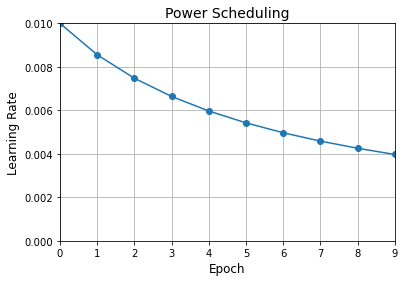

In [26]:
### Viusalizing what learning_rate values

### you can test what power method does in learning rate
n_epochs = 10 ## in the above i try 10 epochs
learning_rate = 0.01
decay = 1e-4
batch_size = 32
n_steps_per_epoch = np.ceil(len(X_train) // batch_size)
epochs = np.arange(n_epochs)
## each step learning rate is updated
lrs = learning_rate / (1 + decay * epochs * n_steps_per_epoch)

plt.plot(epochs, lrs,  "o-")
plt.axis([0, n_epochs - 1, 0, 0.01])
plt.xlabel("Epoch",  fontsize=12)
plt.ylabel("Learning Rate", fontsize=12)
plt.title("Power Scheduling", fontsize=14)
plt.grid(True)
plt.show()

#### `Exponential Scheduling`

$$Lr^{t} = Lr_0 * 0.1^{t/s}$$

#### you can emplement you custom function

In [28]:
## le that initail LR = 0.01
## and i will reduce learing rate each 20 step

def exponential_LR_fn(epoch):
    ''' this function is to get the learning rate at each epoch
    * initial learning rate = 0.01
    * reducing the learning rate each 20 step, each 20 batch_size
    
    '''
    lr_epoch = 0.01 * 0.1**(epoch/20)
    
    return lr_epoch

## you can make LearningRateSchedular, and pass this to callbaks when fitting the Model

model_fashion.compile(loss='sparse_categorical_crossentropy', 
                      optimizer='rmsprop', metrics=['accuracy'])

## pass this function to LearningRateScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_LR_fn)

## pass above  'lr_scheduler' to callabaks in fit
## ==> read hands-on-ML for this Note
history = model_fashion.fit(X_train, y_train, 
                            validation_data=(X_val, y_val), epochs=4, 
                            batch_size=32, callbacks=[early_stopp, lr_scheduler])

Epoch 1/4
1688/1688 [==============================] - 12s 7ms/step - loss: 0.8170 - accuracy: 0.6998 - val_loss: 0.5928 - val_accuracy: 0.7867
Epoch 2/4
1688/1688 [==============================] - 10s 6ms/step - loss: 0.6095 - accuracy: 0.7838 - val_loss: 0.5943 - val_accuracy: 0.7917
Epoch 3/4
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5625 - accuracy: 0.8021 - val_loss: 0.6463 - val_accuracy: 0.7693
Epoch 4/4
1688/1688 [==============================] - 11s 6ms/step - loss: 0.5330 - accuracy: 0.8126 - val_loss: 0.4883 - val_accuracy: 0.8353


#### you can make schedular for exponential instead of your function

`ExponentialDecay` return the below line
```python
return initial_learning_rate * decay_rate ^ (step / decay_steps)
```

In [30]:
model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=[28, 28]),
                tf.keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
                tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
                tf.keras.layers.Dense(10, activation="softmax")
                            ])

## you can try these criteria
## => batch size=32 ==> (len(X_train) // 32)=no of batches in 1 epoch
## for 20 epoch ===> we get the number of batches in 20 epoch

n_epochs = 20
s = n_epochs * len(X_train) // 32  
lr_schedular = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                              decay_steps=s, decay_rate=0.1)

optimizer_with_lr = tf.keras.optimizers.SGD(learning_rate=lr_schedular, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'], 
                      optimizer=optimizer_with_lr)

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                            epochs=n_epochs,
                            validation_data=(X_val, y_val), 
                            batch_size=32, callbacks=[early_stopp])

Epoch 1/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4920 - accuracy: 0.8243 - val_loss: 0.4298 - val_accuracy: 0.8457
Epoch 2/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3936 - accuracy: 0.8569 - val_loss: 0.3809 - val_accuracy: 0.8598
Epoch 3/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3580 - accuracy: 0.8698 - val_loss: 0.3594 - val_accuracy: 0.8660
Epoch 4/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3338 - accuracy: 0.8784 - val_loss: 0.3296 - val_accuracy: 0.8813
Epoch 5/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3137 - accuracy: 0.8855 - val_loss: 0.3201 - val_accuracy: 0.8778
Epoch 6/20
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2979 - accuracy: 0.8908 - val_loss: 0.3149 - val_accuracy: 0.8763
Epoch 7/20
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2848 - accuracy: 0.8949 - val_loss: 0.3249 - val_accuracy:

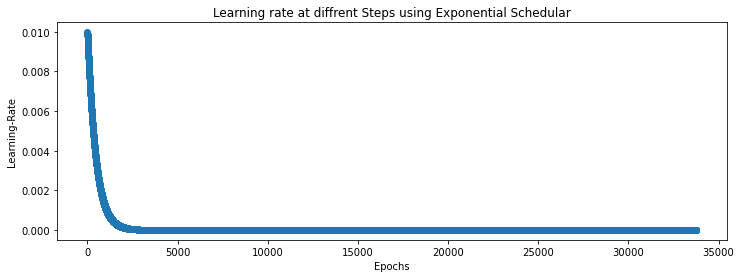

In [31]:
## you can test what is happening to the learning_rate
initial_learning_rate = 0.01
decay_rate = 0.1
## for 20 epoch => i have this number of steps if (batch_size=32)
decay_steps = 20 * len(X_train) // 32

## for this steps ==> 32, 64, ....
steps = []
batch_size_each = 32
for step in range(decay_steps):
    steps.append(batch_size_each)
    batch_size_each += 32
    
steps = np.array(steps) 
lr_each_step = initial_learning_rate * decay_rate**(steps/decay_steps)

### Visualization of this schedular
plt.figure(figsize=(12, 4))
plt.plot(range(1, len(lr_each_step)+1), lr_each_step, 'o--')
plt.xlabel('Epochs')
plt.ylabel('Learning-Rate')
plt.title('Learning rate at diffrent Steps using Exponential Schedular')
plt.show()

#### `Piecewise Scheduling`

for each number of epochs reduce learning_rate steps

#### you can emplement you custom function

In [32]:
## le that initail LR = 0.01
def piecewise_LR(epoch):
    if epochch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001
    
## pass this function to LearningRateScheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(piecewise_LR)

## pass above  'lr_scheduler' to callabaks in fit
# history = model_fashion.fit(X_train, y_train, 
#                             validation_data=(X_val, y_val), epochs=30, 
#                             batch_size=32, callbacks=[early_stopp, lr_scheduler])    

#### `Performance Scheduling`

`multiply the learning rate by a factor less than 1.0, if the monitor like 'val_loss' does not improve for number of epochs` 
#### you can emplement you custom function

In [35]:
## for performance scheduling
lr_scheduler = tf.keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    tf.keras.layers.Dense(10, activation="softmax")
])
optimizer = tf.keras.optimizers.SGD(learning_rate=0.02, momentum=0.9)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 25
history = model.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_val, y_val),
                    callbacks=[lr_scheduler])

Epoch 1/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.5549 - accuracy: 0.8030 - val_loss: 0.4722 - val_accuracy: 0.8285
Epoch 2/25
1688/1688 [==============================] - 8s 4ms/step - loss: 0.4467 - accuracy: 0.8408 - val_loss: 0.4342 - val_accuracy: 0.8430
Epoch 3/25
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4192 - accuracy: 0.8496 - val_loss: 0.3668 - val_accuracy: 0.8663
Epoch 4/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3973 - accuracy: 0.8579 - val_loss: 0.3629 - val_accuracy: 0.8655
Epoch 5/25
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3849 - accuracy: 0.8618 - val_loss: 0.3704 - val_accuracy: 0.8588
Epoch 6/25
1688/1688 [==============================] - 8s 5ms/step - loss: 0.3753 - accuracy: 0.8639 - val_loss: 0.3749 - val_accuracy: 0.8632
Epoch 7/25
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3610 - accuracy: 0.8703 - val_loss: 0.4501 - val_accuracy:

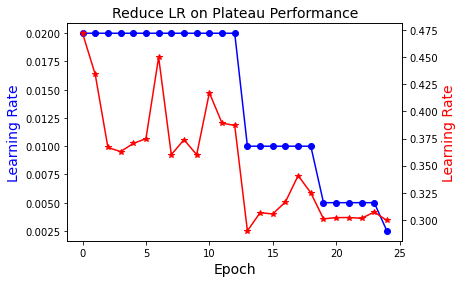

In [36]:
### Visualization of performance scheduling

lr_history = history.history['lr']
val_loss_hist = history.history['val_loss']
n_epochs = history.epoch
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Learning Rate", color='b', fontsize=14)
plt.plot(n_epochs, lr_history, 'bo-')

ax2 = plt.gca().twinx()
ax2.plot(n_epochs, val_loss_hist, 'r*-')
ax2.set_ylabel("Learning Rate", color='r', fontsize=14)
plt.title("Reduce LR on Plateau Performance", fontsize=14)
plt.show()

#### `1Cycle Scheduling`


#### you can emplement you custom function

In [37]:
## i will implement my own function later

### Regularization techniques
1. L1 or L2 or L1_L2 norm
2. max norm
3. Dropout ==> Note if you use selu activation function with lecun init. , you should use Alpha Dropout
4. Monto Carlo (MC) Dropout
5. Batch Normalization ==> works as a regularizer

### $\ell_1$ and $\ell_2$ Reguarizers

In [38]:
## set kernel_regularizer for (l1 or l2 or l1_l2)
tf.keras.layers.Dense(100, activation="elu",
                           kernel_initializer="he_normal",
                           kernel_regularizer=tf.keras.regularizers.l2(0.01))
# or l1(0.1) for ℓ1 regularization with a factor or 0.1
# or l1_l2(0.1, 0.01) for both ℓ1 and ℓ2 regularization, with factors 0.1 and 0.01 respectively

In [39]:
## you can use this method for making yout code more neat and beatiful
## using partial from functools , you can get a class contains all what you need
from functools import partial

## this will return a class contains these data
func_ready = partial(tf.keras.layers.Dense, 
                        activation='elu', 
                        kernel_initializer='he_normal', 
                        kernel_regularizer=tf.keras.regularizers.l2(0.01))

model_new = tf.keras.models.Sequential()
model_new.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model_new.add(func_ready(300))
model_new.add(func_ready(100))
model_new.add(func_ready(10, activation='softmax'))

## check summary
model_new.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_11 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_35 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_36 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


### Dropout

In [40]:
## using dropout 
model_drop = tf.keras.models.Sequential()
model_drop.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model_drop.add(tf.keras.layers.Dense(300, activation='elu', kernel_initializer='he_normal'))
model_drop.add(tf.keras.layers.Dropout(0.5))    ## here i add layer dropout with factor=0.5
model_drop.add(tf.keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal'))
model_drop.add(tf.keras.layers.Dropout(0.5))
model_drop.add(tf.keras.layers.Dense(10, activation='softmax'))

model_drop.summary()

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_12 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_37 (Dense)             (None, 300)               235500    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 100)               30100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_______________________________________________

In [41]:
## using Alpha dropout for selu with lecun
model_drop = tf.keras.models.Sequential()
model_drop.add(tf.keras.layers.Flatten(input_shape=[28,28]))
model_drop.add(tf.keras.layers.Dense(300, activation='selu', kernel_initializer='lecun_normal'))
## version of dropout to self normalize with selu and lecun init.
model_drop.add(tf.keras.layers.AlphaDropout(rate=0.5, seed=123))    ### you can use seed
model_drop.add(tf.keras.layers.Dense(100, activation='selu', kernel_initializer='lecun_normal'))
## version of dropout to self normalize with selu and lecun init.
model_drop.add(tf.keras.layers.AlphaDropout(rate=0.5, seed=123)) 
model_drop.add(tf.keras.layers.Dense(10, activation='softmax'))

### Monto_Carlo (MC) Dropout
`it provides much better measure of the model's uncertainity , gives you much insights for the output` <br />
`MC dropout ==> get the probability by Activating the dropout during testing`

In [42]:
### train and compile a model 
model = tf.keras.models.Sequential([
                tf.keras.layers.Flatten(input_shape=[28, 28]),
                tf.keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
                tf.keras.layers.Dropout(rate=0.3),
                tf.keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
                tf.keras.layers.Dropout(rate=0.3),
                tf.keras.layers.Dense(10, activation="softmax")
                            ])

## you can try these criteria
## => batch size=32 ==> (len(X_train) // 32)=no of batches in 1 epoch
## for 20 epoch ===> we get the number of batches in 20 epoch

n_epochs = 5
s = n_epochs * len(X_train) // 32  
lr_schedular = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.01, 
                                                              decay_steps=s, decay_rate=0.1)

optimizer_with_lr = tf.keras.optimizers.SGD(learning_rate=lr_schedular, momentum=0.9, nesterov=True)
model.compile(loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'], 
                      optimizer=optimizer_with_lr)

early_stopp = tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)
history = model.fit(X_train, y_train, 
                            epochs=n_epochs,
                            validation_data=(X_val, y_val), 
                            batch_size=32, callbacks=[early_stopp])

Epoch 1/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.5800 - accuracy: 0.7914 - val_loss: 0.4152 - val_accuracy: 0.8513
Epoch 2/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4533 - accuracy: 0.8371 - val_loss: 0.4001 - val_accuracy: 0.8488
Epoch 3/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4244 - accuracy: 0.8456 - val_loss: 0.3672 - val_accuracy: 0.8623
Epoch 4/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.4051 - accuracy: 0.8534 - val_loss: 0.3597 - val_accuracy: 0.8657
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.3923 - accuracy: 0.8590 - val_loss: 0.3552 - val_accuracy: 0.8662


In [43]:
## you predict X_test ('another method without calling predict')
## I set trainig=True => to allow dropout during testing, that is not allowed in the ordinary cases

## here i choose to make 100 prediction(randomly because dropout is active) for each instance
## for each instance you have 100 diffrent proabilities, you can try other number
y_probability_MC = np.stack([model(X_test, training=True) for sample in range(100)])
y_mean_each_MC = y_probability_MC.mean(axis=0)
# shape of the 100 prediction for each output , and 10 output classes (probabilty using softmax)
print('y_probability_MC.shape =>', y_probability_MC.shape)
print()
## after thaking the mean ==> shape
print('y_mean_each_MC.shape =>', y_mean_each_MC.shape)

y_probability_MC.shape => (100, 10000, 10)

y_mean_each_MC.shape => (10000, 10)


In [44]:
## for example for each instance >>> that is the mean probability of the prediction
## this mean is over 100 randomly activating dropout during testing
## that what is called MC Drop out
## it gives you much uncertainity of your output
## if you predict without MC, you will get a hard prediction cancelling the dropout at testing
np.round(y_mean_each_MC[0], 2)  ## seems Good!

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.14, 0.  , 0.11, 0.  , 0.74],
      dtype=float32)

### Max_Norm Regularizer

`you can specify that your waeights is constraints by not exceed specified threshold` <br />

`Max_Norm Regularization loss does not loss term to cost function, after each training step, compute the norm2 of weights and if they need scaling to not exceed a specified threshold`

In [45]:
### you can add kernel_constraint to the layers

model_maxnorm = tf.keras.models.Sequential()

from functools import partial
## make ready layers to be added
ready_add_layers = partial(tf.keras.layers.Dense, 
                            activation='elu', 
                            kernel_initializer='he_normal', 
                            kernel_regularizer=tf.keras.regularizers.l2(0.001),
                            kernel_constraint=tf.keras.constraints.max_norm(1.0))  ## not exceed=1.0

## add layers
model_maxnorm.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model_maxnorm.add(ready_add_layers(300))
model_maxnorm.add(ready_add_layers(100))
model_maxnorm.add(ready_add_layers(10, activation='softmax'))

## making exponential schedular for learning rate, compile and fit the model
## let's use only n_spochs = 3
n_epochs = 3
s = n_epochs * len(X_train) // 32
lr_expon = tf.keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.001, 
                                                          decay_steps=s, decay_rate=0.1)
optim_sgd = tf.keras.optimizers.SGD(learning_rate=lr_expon, momentum=0.9, nesterov=True)
## compile
model_maxnorm.compile(loss='sparse_categorical_crossentropy', 
                      metrics=['accuracy'],
                      optimizer=optim_sgd)
## fit
histroy = model_maxnorm.fit(X_train, y_train, validation_data=(X_val, y_val), 
                            epochs=n_epochs, batch_size=32, callbacks=[early_stopp])

Epoch 1/3
1688/1688 [==============================] - 11s 7ms/step - loss: 1.2056 - accuracy: 0.7354 - val_loss: 1.0087 - val_accuracy: 0.7973
Epoch 2/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.9835 - accuracy: 0.8041 - val_loss: 0.9421 - val_accuracy: 0.8248
Epoch 3/3
1688/1688 [==============================] - 11s 6ms/step - loss: 0.9491 - accuracy: 0.8150 - val_loss: 0.9235 - val_accuracy: 0.8253


-------
-----


## Done!